### EE 421/521 Image Processing - Spring 2021-22

## Project 12 - Image Coding

#### Submission deadline: 21 May 2022

In this project, you will implement the following:

1. Vector Huffman coding

**This project will be graded for both EE 421 (HW8) and EE 521 (HW11) students.**

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

************************************
**Metin Arda Köker**
************************************

In [1]:
# import necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# array operations
import numpy as np

# mathematical calculations
import math

# data frame operations
import pandas as pd

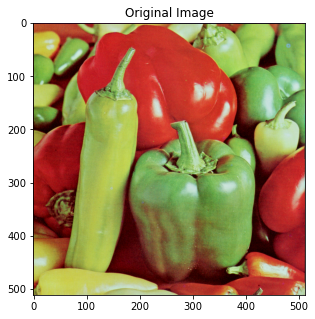

In [2]:
# set image folder
image_folder = r'C:\Users\Metin\Desktop\EE421\Week12'


# read a 512x512 image file and correct color order
image_file = r'/peppers.png'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

plt.figure(figsize=(5,5))
plt.subplot(111), plt.imshow(imgRGB)
#plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.show()
plt.close()


In [3]:
# my function to calculate the histrogram of an image

# img: image with a single color band
# nBit: number of most significant bits to retain
def my_Histogram(img, nBit):
    
    # calculate the number of levels corresponding to the number of bits retained
    nLevel = 2**nBit

    # quantize the image to the specified number of bits
    valMax = 0
    for i in range(8-nBit,8):
        valMax += 2**i
    
    # retain only the most significant nBit bits
    imgQuan = img & valMax

    # calculate the histogram of the quantized image
    hist = np.zeros((nLevel,), dtype=int)
    valMin = 2**(8-nBit)
    for n in range(nLevel):
        hist[n] = np.count_nonzero(imgQuan==n*valMin)
    
    # return the histogram, quantized image, and number of levels
    return hist, imgQuan, nLevel

# end of my function

In [4]:
def my_Huffman(df):
    
    print("\nInput Source:\n", df)  
    
    # 1. sort the symbols in decreasing probabilities
    df.sort_values(by=['probabilities'], ascending=False, inplace=True)
    
    # 2. if more than 2 symbols, merge the last two symbols to obtain a reduced source
    # last code of the reduced source
    last_code = ''
    length = df.shape[0]
    if length > 2:
        # copy the source except the last symbol
        df_merged = df[:-1].copy(deep=True)
        # combine the last two symbols
        df_merged.iloc[-1, 1] += df.iloc[-1, 1]
        # combine the last two probabilities
        df_merged.iloc[-1, 2] += df.iloc[-1, 2]
        # re-number the symbols from 0 to length-1
        for i in range(length-1):
            df_merged.iloc[i,0] = i
            
        # 3. find the Huffman code for the reduced source
        my_Huffman(df_merged)   

        # 4. copy the codewords from the reduced source
        for i in range(length-2):
            df.iloc[i, 3] = df_merged.iloc[i, 3]
        last_code = df_merged.iloc[length-2, 3]

    # 4. add 0 and 1 two the last two codewords, respectively 
    df.iloc[-2, 3] = last_code + '0'
    df.iloc[-1, 3] = last_code + '1'
    
    # 5. unsort the symbols
    df.sort_values(by=['order'], ascending=True, inplace=True)

    print("\nReturned Codes:\n", df)  
        
    return


In [15]:
def my_Entropy(pdf):
    
    assert pdf.ndim == 1
    size = pdf.size
        
    entropy = 0.0
    for i in range(size):
        val = pdf[i]
        if val:
            entropy += - val * math.log2(val)

    return entropy

In [56]:
def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    dim_img = imgRGB.shape[2]    
    assert dim_img >= 3
    
    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

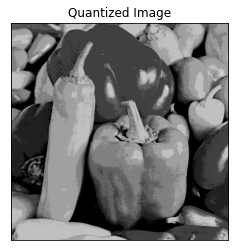

In [61]:
# STEP 1 Quantize the image with 32 so that there are only 8 intensity levels

# ADD YOUR CODE HERE

if imgRGB.ndim >= 3:
    # calculate the luminance image
    imgLum = my_imgLuminance(imgRGB)
else:
    imgLum = imgRGB


# calculate the histogram
nBit = 3
histLum, imgLumQuan, numLevel = my_Histogram(imgLum, nBit)

# display the quantized image
plt.imshow(imgLumQuan, cmap='gray', vmin=0, vmax=255)
plt.title('Quantized Image'), plt.xticks([]), plt.yticks([])
plt.show()

['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ba', 'bb', 'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'ga', 'gb', 'gc', 'gd', 'ge', 'gf', 'gg', 'gh', 'ha', 'hb', 'hc', 'hd', 'he', 'hf', 'hg', 'hh']
[0.044832865397135414, 0.008027394612630209, 0.008444468180338541, 0.00966644287109375, 0.010885874430338541, 0.010477701822916666, 0.011235555013020834, 0.015177408854166666, 0.02291107177734375, 0.03192138671875, 0.033894856770833336, 0.027974446614583332, 0.024224599202473957, 0.020612080891927082, 0.018839518229166668, 0.016585032145182293, 0.015108744303385416, 0.015416463216145834, 0.016653696695963543, 0.019761403401692707, 0.021060943603515625, 0.019404093424479168, 0.017870585123697918, 0.01507568359375, 0.014481862386067709, 0.01366424560546875, 0.014378865559895834, 0.015242258707682291, 0.0165265

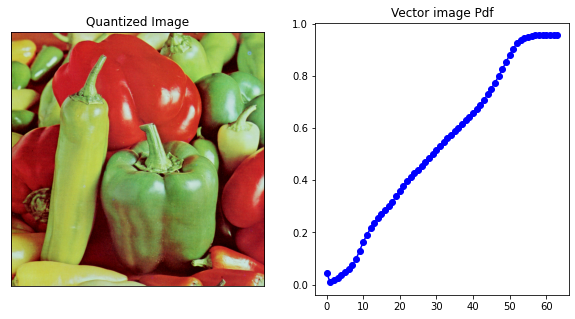

In [62]:
# STEP 2 Define a vector source by combining two consecutive pixels
#        and calculate the probabilities of these vector symbols

# ADD YOUR CODE HERE

# notes:
# since each pixel has 8 intensity levels, there will be 8x8 = 64 symbols in the vector source.
# the symbols for the vector source could be represented as "aa, ab, ac, ..., hf, fg, hh."
# there are a total of 512*512/2 = 131,072 sample vectors in the input image to calculate the histogram

# calculate the histogram of the vector symbols
# ADD YOUR CODE HERE

nBit = 6
vectoral_hist, imgQuan, nLevel = my_Histogram(imgRGB, nBit)

vectoral_pdf = vectoral_hist / vectoral_hist.sum()

# define probabilities and codewords
order = []
symbols = []
probabilities = []
codewords = []

letters = ["a","b","c","d","e","f","g","h"]
for i, p in enumerate(vectoral_pdf):
    order.append(i) # used to unsort the symbols
    symbol1 = letters[i//8]
    symbol2 = letters[i % 8]
    symbols.append(f"{symbol1}{symbol2}") # letters to represent symbols
    probabilities.append(p) # probabilities of symbols
    codewords.append('') # used to hold the codewords

print(symbols)
print(probabilities,"\n")

vectoral_pdf = np.zeros(len(probabilities))
for i, p in enumerate(probabilities):
    if i>1:
        vectoral_pdf[i] = vectoral_pdf[i-1] + p
    else:
        vectoral_pdf[i] = p


print(vectoral_pdf)
# obtain the pdf by normalizing the histogram

# plot the pdf of this vector source
# plot pdf
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(imgQuan, cmap='gray', vmin=0, vmax=255)
plt.title('Quantized Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(vectoral_pdf, color = 'b', marker = 'o')
plt.title('Vector image Pdf'.format(0))
plt.show()
plt.close()

In [63]:
def my_Entropy(pdf):
    
    assert pdf.ndim == 1
    size = pdf.size
        
    entropy = 0.0
    for i in range(size):
        val = pdf[i]
        if val:
            entropy += - val * math.log2(val)

    return entropy

In [64]:
# STEP 3.a Calculate the entropy of the scalar source

# ADD YOUR CODE HERE
entropy = my_Entropy(histvecpdf)

# print the value of the entropy of the scalar source
print("Entropy of the scalar source is",entropy)


Entropy of the scalar source is 2.8108444719905488


In [65]:
# STEP 3.b Calculate the entropy of the vector source per input source symbol

# ADD YOUR CODE HERE

# note:
# divide the vector entropy value by 2 to find the entropy per input source symbol 
for i in range(0,8):
    entLumSca = my_Entropy(vectoral_pdf[0:i])
    print("input " , i , "entropy value is " , entLumSca/2)# # print the value of the entropy of the vector source per input source symbol
# print the value of the entropy of the vector source per input source symbol


input  0 entropy value is  0.0
input  1 entropy value is  0.10040991534489017
input  2 entropy value is  0.12834867013314963
input  3 entropy value is  0.17713711269525065
input  4 entropy value is  0.24585067421859744
input  5 entropy value is  0.33388285253672806
input  6 entropy value is  0.4382889374434619
input  7 entropy value is  0.5583945399949849


In [66]:
# STEP 4.a Find the Huffman code for the scalar source

# ADD YOUR CODE HERE
order = []
symbols = []
probabilities = []
codewords = []

imgPdf = hist / hist.sum()

for i, p in enumerate(imgPdf):
    order.append(i)
    symbols.append(chr(i+97))
    probabilities.append(p)
    codewords.append('')

data_source = {'order': order, 'symbols': symbols, 'probabilities': probabilities, 'codewords': codewords}

frame_source = pd.DataFrame(data_source)
# print the scalar Huffman code
print(my_Huffman(frame_source))





Input Source:
    order symbols  probabilities codewords
0      0       a       0.118748          
1      1       b       0.196963          
2      2       c       0.140352          
3      3       d       0.121236          
4      4       e       0.110746          
5      5       f       0.154788          
6      6       g       0.152626          
7      7       h       0.004542          

Input Source:
    order symbols  probabilities codewords
1      0       b       0.196963          
5      1       f       0.154788          
6      2       g       0.152626          
2      3       c       0.140352          
3      4       d       0.121236          
0      5       a       0.118748          
4      6      eh       0.115288          

Input Source:
    order symbols  probabilities codewords
1      0       b       0.196963          
5      1       f       0.154788          
6      2       g       0.152626          
2      3       c       0.140352          
3      4       d       0.121

In [68]:
# STEP 4.b Find the Huffman code for the vector source

# ADD YOUR CODE HERE

# print the vector Huffman code
order = []
symbols = []
probabilities = []
codewords = []

for i, p in enumerate(vectoral_pdf):
    order.append(i) # used to unsort the symbols
    symbols.append(chr(i+97)) # letters to represent symbols
    probabilities.append(p) # probabilities of symbols
    codewords.append('') # used to hold the codewords

# create a dictionary of order, symbols, probabilities and codewords
data_source = {'order': order, 'symbols': symbols, 'probabilities': probabilities, 'codewords': codewords}

# create a pandas data frame from the above dictionary
frame_source = pd.DataFrame(data_source)

# find Huffman codes
my_Huffman(frame_source)


Input Source:
     order symbols  probabilities codewords
0       0       a       0.044833          
1       1       b       0.008027          
2       2       c       0.016472          
3       3       d       0.026138          
4       4       e       0.037024          
..    ...     ...            ...       ...
59     59              0.955167          
60     60              0.955167          
61     61              0.955167          
62     62              0.955167          
63     63               0.955167          

[64 rows x 4 columns]

Input Source:
     order symbols  probabilities codewords
63      0               0.955167          
62      1              0.955167          
61      2              0.955167          
60      3              0.955167          
59      4              0.955167          
..    ...     ...            ...       ...
5      58       f       0.047502          
0      59       a       0.044833          
4      60       e       0.037024          

In [69]:
# STEP 5.a Calculate the average codeword length for the scalar Huffman code


length = frame_source.shape[0]

# calculate the average codeword length
average_length = 0
for i in range(length):
    code_probability = frame_source.iloc[i, 2]
    code_length = len(frame_source.iloc[i, 3])
    average_length += code_probability * code_length

print('Number of bits:         ', 3)

print('Average Codeword Length: {:.3f}'.format(average_length))

# calculate the entropy
entLum = my_Entropy(vectoral_pdf)

print('Entropy of the source:   {:.3f}'.format(entLum))

# print the average codeword length for the scalar Huffman code


Number of bits:          3
Average Codeword Length: 194.084
Entropy of the source:   21.049


In [70]:
# STEP 5.b Calculate the average codeword length for the vector Huffman code per input source symbol

# ADD YOUR CODE HERE

# note: 
# divide the vector average codeword length by 2 to find the average codeword length per input source symbol 
average_codeword= average_length/2
# print the average codeword length per input source symbol for the vector Huffman code 
print('The average codeword length per input source: {:.3f}'.format(average_codeword))

The average codeword length per input source: 97.042


*STEP 6 Comments on the results*

*ADD YOUR COMMENTS HERE*

Compare and comment on (a) scalar and vector entropy values, (b) scalar and vector average codeword lengths, and (c) entropy values and average codeword lengths, that are obtained in Steps 3 and 5.

a) Entropy values is higher in vectoral 

b) Average Codeword Lengts are directly related with cell number. In vectoral it has 64 different acl. 

c) In vectoral it should be lower than the scaler but the output is not as expected.

